In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

%matplotlib inline
from matplotlib import style
style.use("seaborn")

from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

C:\Users\Shre\AppData\Local\Temp\ipykernel_8656\1520886021.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn")


# Loading the dataset

In [2]:
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

## General Overview of Dataset

In [3]:
calories.head(20)

User_ID  Calories
0   14733363     231.0
1   14861698      66.0
2   11179863      26.0
3   16180408      71.0
4   17771927      35.0
5   15130815     123.0
6   19602372     112.0
7   11117088     143.0
8   12132339     134.0
9   17964668      72.0
10  13723164       3.0
11  13681290      92.0
12  15566424      58.0
13  12891699      88.0
14  13823829       7.0
15  17557348     170.0
16  12198133      11.0
17  15236104      43.0
18  11042324      15.0
19  16864285      74.0

In [4]:
exercise.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [5]:
exercise_df = exercise.merge(calories , on = "User_ID") #merging the datasets
exercise_df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [6]:
print("This dataset has " , exercise_df.shape[0] ," instances and ",  exercise_df.shape[1] , " columns.")

This dataset has  15000  instances and  9  columns.


In [7]:
print("Columns : ")
for i , column in zip(range(len(exercise_df.columns)) , exercise_df.columns):
  print("\t" , i + 1 , "." ,  column)

Columns : 
	 1 . User_ID
	 2 . Gender
	 3 . Age
	 4 . Height
	 5 . Weight
	 6 . Duration
	 7 . Heart_Rate
	 8 . Body_Temp
	 9 . Calories


1.**User_ID** : The ID of the person which is unique.\
2.**Gender** : Gender of the person.\
3.**Age** : Age of the person.\
4.**Height** : Height of the person in $cm$.\
5.**Weight** : Weight of the person in $kg$.\
6.**Duration** : Duration of the person's exercise/activity.\
7.**Heart_Rate** : Heart rate per $min$ of the person.\
8.**Body_Temp** : Body temperature of the person in $C^{\circ}$.\
9.**Calories** : Calories burned in kilo calories.

### Dataset's Overall Statistic

In [9]:
exercise_df.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

# With the use of boxplot we find out the spread of the data
* where the whiskers are the extreme values-gives the range 
* (Larger the range,more spread the data)
    Q1-25% data
    Q3-75% data
    min,max-excluding outliers
                      
* The median gives the avg value of data
* The boxplot shows how dispersed the data is,if it is skewed or not
* if the median is at the center,normal distribution
* median closer to first quartile,whisker end is shorter-POSITIVE SKEW
* median closer to third quartile,whisker end longer -NEGATIVE SKEW

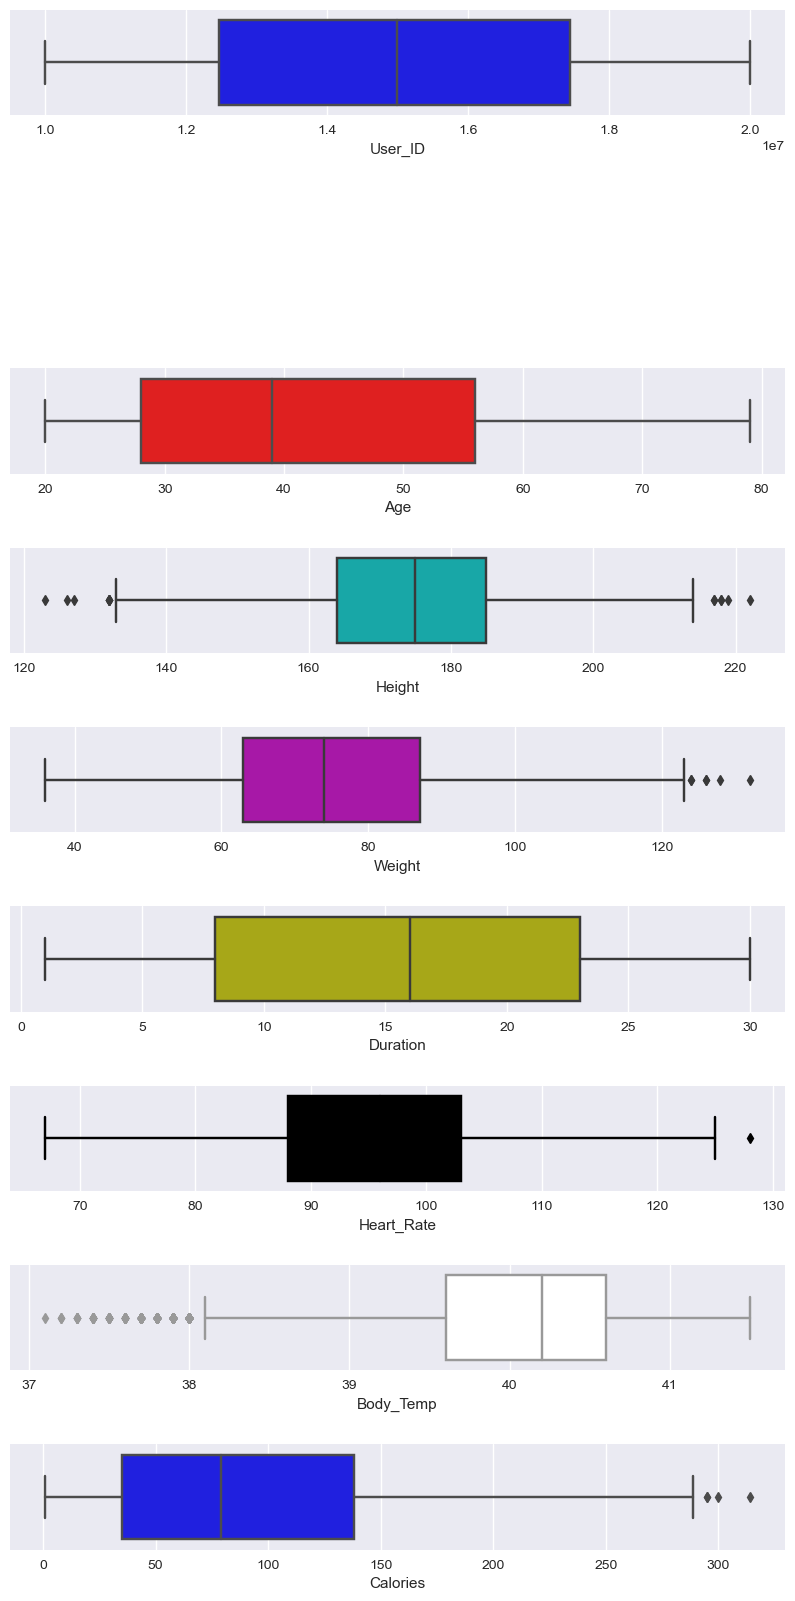

In [51]:
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']
fig1 , axes = plt.subplots(len(exercise_df.columns) , 1 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension
for i , column in zip(range(len(exercise_df.columns)) , exercise_df.columns):
  try:
     sns.boxplot(data = exercise_df , x = column , color = c[i] , ax = axes[i])
  except:
     fig1.delaxes(axes[i])
     continue


### Overall information of dataset

In [ ]:
exercise_df.info()

### Null Values
In this section we are going to check whether this dataset has null values or not.We will check this with heatmap.Because it is easy to understand and we can see dataset's condition at a glance. 

<Axes: >

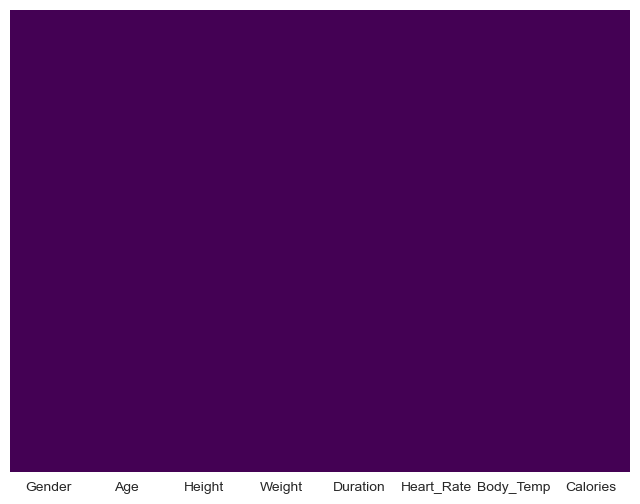

In [55]:
sns.heatmap(exercise_df.isnull() , yticklabels = False , cbar = False , cmap = "viridis")

In [54]:
exercise_df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

* As we can see, fortunately, this dataset does not have any null/NaN values, which is good and it is not necessary to do extra manipulations(for instance imputation , dropping or filling NaN values etc.) with this dataset.

### Checking for duplicates
Lets assure that this dataset does not contain any duplicate values in `User_ID` column.

In [52]:
print("The shape of dataset before dropping duplicates : " , exercise_df.shape)
exercise_df.drop_duplicates(subset = ['User_ID'], keep='last' , inplace = True)    # Keeping the first example of duplicates in 'User_ID' column.
print("The shape of dataset after dropping duplicates : " , exercise_df.shape)

The shape of dataset before dropping duplicates :  (15000, 9)
The shape of dataset after dropping duplicates :  (15000, 9)


* As we can see the shape of dataset before and after dropping duplicates is the same.It is a good sign, because we do not need to be worry about `Data Leakage`.

* In the next step we have to delete `User_ID` feature.Because it is a `low predictive feature`.In other words, it is not only a useless feature for our calorie burned prediction model but also has a negative impact on model's accuracy.

In [53]:
exercise_df.drop(columns = "User_ID" , inplace = True)


* For avoiding any `Data Leakage` in our model, let's split our data into training set and test set before doing any `feature engineering`.

# Splitting the data into training and test data

In [11]:
exercise_train_data , exercise_test_data = train_test_split(exercise_df , test_size = 0.2 , random_state = 1)
print("Shape of training data : " , exercise_train_data.shape)
print("Shape of test data : " , exercise_test_data.shape)

Shape of training data :  (12000, 9)
Shape of test data :  (3000, 9)


### Dataset's Distribution-Checking if the features between training and testing are similar using graphs

One of the main criterions that whether we will be able to deploy our model into production or not, is that **the distribution of features for both training set and test set must be similar**.This is because the model is fitting on the training set and the model keeps in mind the training set patterns.When the distribution of test set is different from the training set it means that the model can not predict very well on test set examples and unlike the training set accuracy, the testing set accuracy will be low.This is because, at first, we have to see and compare the distributions for both test set and training set and check whether both have the same distribution or not.
We make us if zip() along with for loop to be able to iterate over 3 seq simultan...

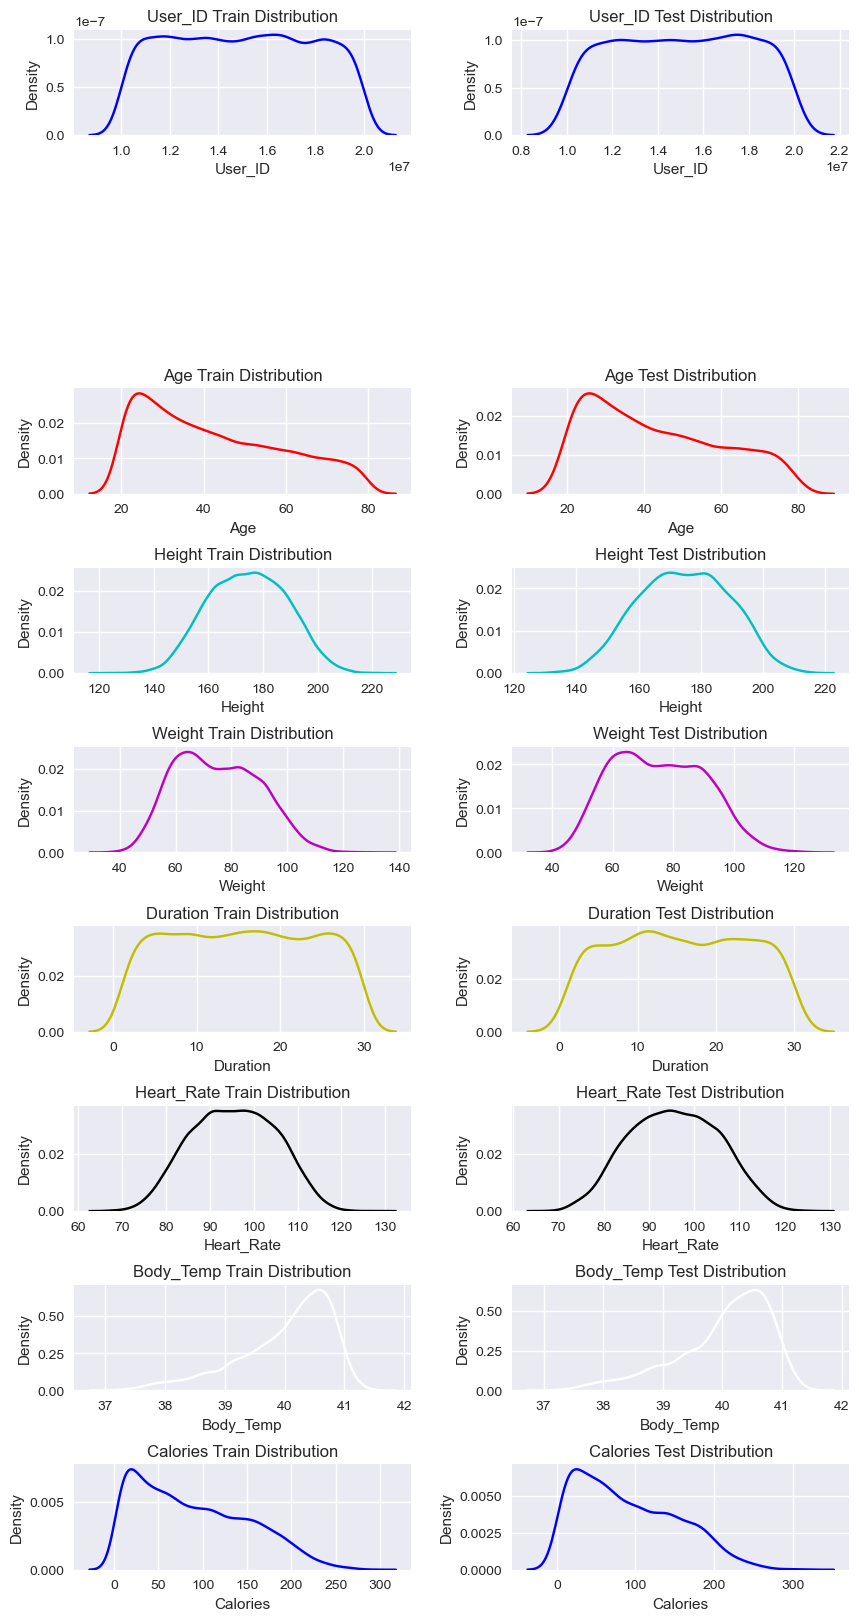

In [12]:
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']  #color for each of the graph
fig1 , axes = plt.subplots(len(exercise_train_data.columns) , 2 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension

for i , column , color in zip(range(0 , len(exercise_train_data.columns) * 2 , 2) , exercise_train_data.columns , c):
 try:# makes use of even indices
    axes[i].title.set_text(column + " Train Distribution")
    sns.kdeplot(data = exercise_train_data , x = column , ax = axes[i] , color = color)  # will create plot of the current col of training data
 except:
     fig1.delaxes(axes[i]) # remove a specific subplot at index i from axes array
 continue

for i , column , color in zip(range(1 , len(exercise_train_data.columns) * 2 , 2) , exercise_train_data.columns , c): # makes use of odd indices
 try:   
    axes[i].title.set_text(column + " Test Distribution")
    sns.kdeplot(data = exercise_test_data , x = column , ax = axes[i] , color = color)
 except:
    fig1.delaxes(axes[i])
 continue

* As we can see, the distributions of features for training and test sets are pretty similar, which is good for now.

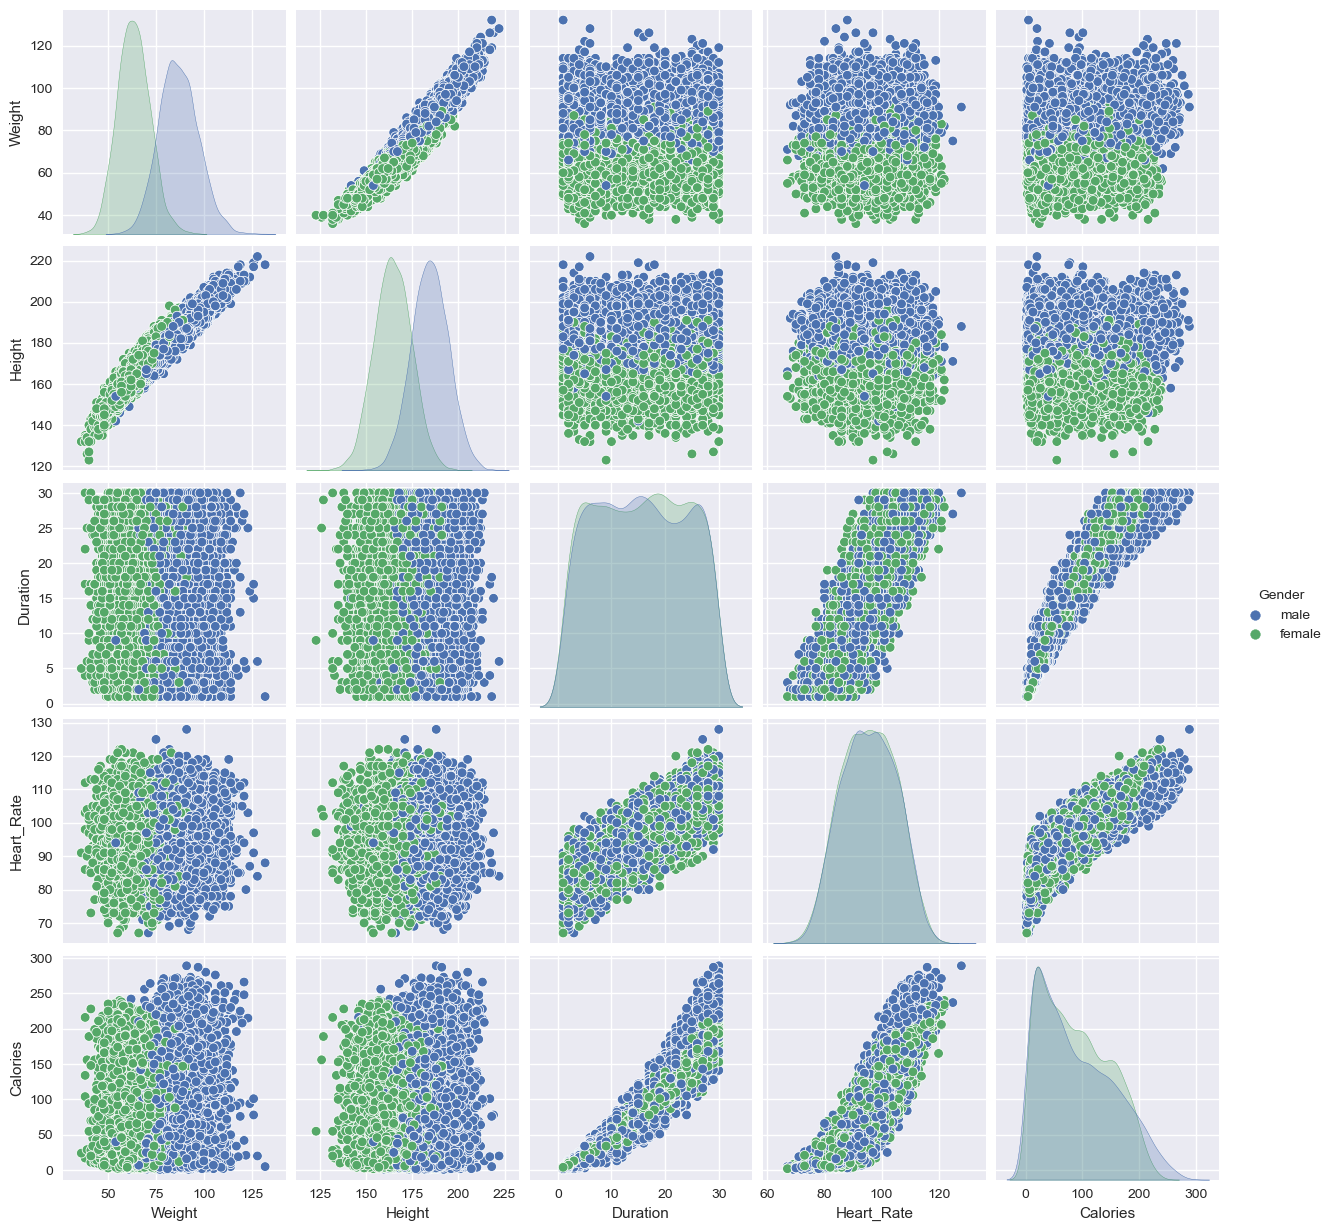

In [13]:
sns.pairplot(exercise_train_data[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")
# we use pairplot to create matrix of scatterplot for selected col
# last arg specifies the point should be colored based on values in gender col

* As we can see from graphs above, there is not a specific correlation or relationship between most of the features in the dataset.For example,there is not a specific relationship between `Duration` and `Weight` or between `Duration` and `Hight`.This is because exercisers may have different exercise duration no matter of their `Weight` and `Height`.

* In some cases, a feature has a low relationship with another feature, like `Duration` and `Heart_Rate`.Somehow(with low confident) we can say that the more time somebody exercises the more 'Heart Rate' per minute he/she will have.

* In some cases , two featrues have a high relationship(in compare to last two cases), like `Height` and `Weight`.
---
* There are more informations and benefits that we can get from `Correlation` concept.But thats for now and we will go further in the next section.

### Exploratory Data Analysis(EDA)

In [14]:
print('Minimum age in dataset is : ' , exercise_train_data["Age"].min())
print('Maximum age in dataset is : ' , exercise_train_data["Age"].max())

Minimum age in dataset is :  20
Maximum age in dataset is :  79


* As we can see the oldest person in dataset is 79 years old and the youngest is 20 years old.What we want to do is divide this range of ages into several named ranges.In other words we want to convert the continuous column into categorical column.\
The ranges are:

| Name            | Age           |
| ----------------|:-------------:|
| **Young**       |[20 , 40)      |
| **Middle-Aged** |[40 , 60)      |
| **Old**         |[60 , 80)      |
 


In [15]:
age_groups = ["Young" , "Middle-Aged" , "Old"]
exercise_train_data["age_groups"] = pd.cut(exercise_train_data["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)
exercise_train_data["age_groups"].head()

2643             Old
13352            Old
13117            Old
2560             Old
14297    Middle-Aged
Name: age_groups, dtype: category
Categories (3, object): ['Young' < 'Middle-Aged' < 'Old']

In [16]:
exercise_train_data["age_groups"].value_counts() # gives us count for each unique in col age_grp

Young          6029
Middle-Aged    3535
Old            2436
Name: age_groups, dtype: int64

* As we can see we have just converted a continuous column into a categorical column.Now its time to analyze `age_groups` column in terms of different aspects.

<Axes: xlabel='age_groups', ylabel='count'>

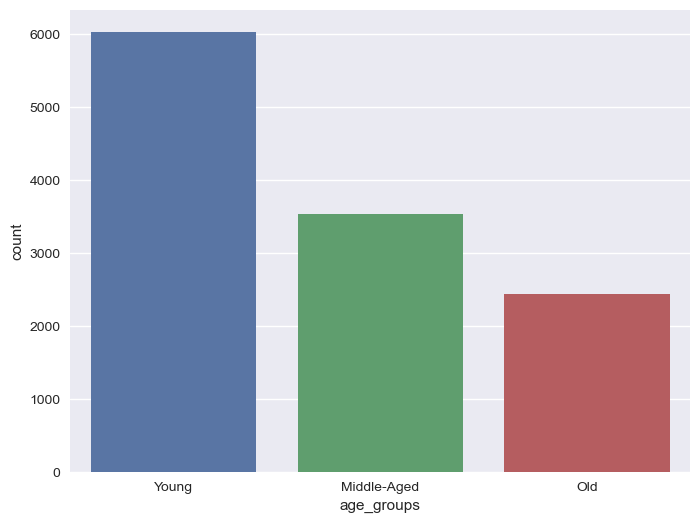

In [17]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.countplot(data = exercise_train_data , x = "age_groups")

* As we expected, there is a significant difference between in counts of different age groups.Most of the people of this dataset are **young**.The second is **middle-aged** and the third one is **old**.

Lets analyze how many kilocalories each age groups burned.We will do this with `box plot`.Because `box plot` has a intuitive graph that we can extract **Median** , **Interquartile Range** , **Outliers** and etc.Just like the picture below shows.



In [18]:
fig = px.box(exercise_train_data , x= "age_groups" , y = "Calories" , color = "Gender")

fig.update_layout(      
    width=700,
    height=450,
)

fig.show()

* As we can observe, old individuals have burned more kilocalories in compare of two other age groups.And the young persons are the least in burning kilocalories which is a surprise!

* Another interesting thing is, females in all age ranges performed very similar.In other words, they burned same amount of kilocalories in average.But for males, old group outperformed and the youth have the weakest performance.

* Also there is an outlier for young group which is shown by a point.This point has a value which is greater than third quartile value(Q3) plus 1.5 times of interquartile range magnitude.
\
\
`Outlier` > `Q3 + 1.5 * IQR`\
OR\
`Outlier` < `Q1 - 1.5 * IQR`


Now lets see which group have the most exercise duration in minutes.

In [19]:
fig = px.box(exercise_train_data , x= "age_groups" , y = "Duration" , color = "Gender")

fig.update_layout(      
    width=750,
    height=450,
)

fig.show()

* As we can see , the exercise duration of each group is pretty identical.Every group have the same interquartile range , median and so on.

* In addition, the duration is very similar for males and females in `old` and `middle-aged` groups.But in `youth`, males outperformed.

* Another tip is, the median exercise duration of this dataset is about 15 minutes.We will assure this by the code bellow:

In [20]:
print("dataset's median exercise duration in mins: " ,  exercise_train_data["Duration"].median())
print("dataset's mean exercise duration in mins: " ,  exercise_train_data["Duration"].mean())

dataset's median exercise duration in mins:  16.0
dataset's mean exercise duration in mins:  15.520083333333334


### Gender
Lets plot the count plot of each gender to see how many exercisers are male and how many of them are female.

<Axes: xlabel='Gender', ylabel='count'>

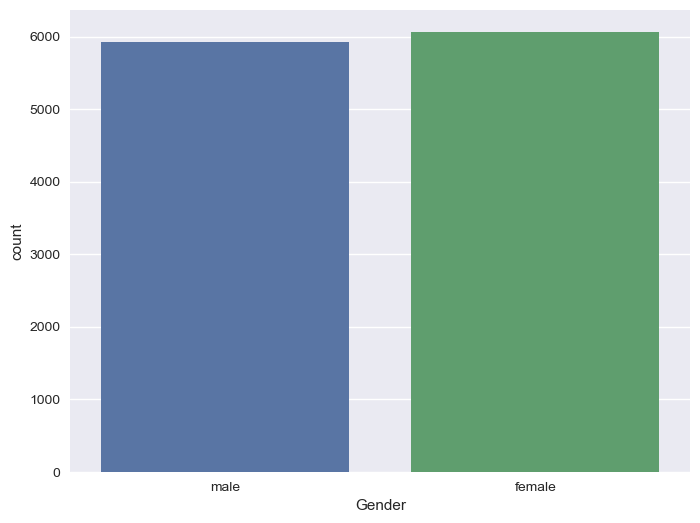

In [21]:
plt.rcParams["figure.figsize"] = 8 , 6   # set the default figsize for matplotlib plots, setting the width and height
sns.countplot(data = exercise_train_data , x = "Gender")

* As we can see, number of females are slightly higher than man but this distinction is not significant.we can say, in general, they are equal.




# BMI Calculation


In this section our purpose is combine the `Weight` column and the `Height` column values to perform a simple BMI calculation to classify individuals of this dataset into different groups according to their BMI value.

* The BMI(Body Mass Index) formula:


$BMI = \frac{Weight(kg)}{Height(m)^2}$

* The first formula will be used because the units for `Weight` and `Height` of this dataset is `kg` and `meter` in respect.

* we will classify instances according to below table:


|   Categoty                                       | from          | to    |
| -------------------------------------------------|:-------------:| -----:|
| Very severely underweight                        | --            |  15   |
| Severely underweight                             | 15            |  16   |
| Underweight                                      | 16            |  18.5 |
| Normal (healthy weight)                          | 18.5          |  25   |
| Overweight                                       | 25            |  30   |
| Obese Class I (Moderately obese)                 | 30            |  35   |
| Obese Class II (Severely obese)                  | 35            |  40   |
| Obese Class III (Very severely obese)            | 40            |       |

* We will classify examples according to above category:

In [22]:
for data in [exercise_train_data , exercise_test_data]:         # adding BMI column to both training and test sets
 data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
 data["BMI"] = round(data["BMI"] , 2)

In [23]:
# exercise_test_data["BMI"] = exercise_test_data["Weight"] / ((exercise_test_data["Height"] / 100) ** 2)
# exercise_test_data["BMI"] = round(exercise_test_data["BMI"] , 2)
exercise_test_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
7576   16514801  female   74   165.0    68.0      29.0       106.0       41.0   
10509  14897353    male   43   186.0    93.0      13.0        97.0       39.9   
4253   17420315  female   43   148.0    52.0      29.0       108.0       40.5   
5150   13693592    male   62   182.0    84.0       4.0        83.0       38.9   
506    13439081  female   37   173.0    67.0      15.0        94.0       40.0   

       Calories    BMI  
7576      198.0  24.98  
10509      72.0  26.88  
4253      195.0  23.74  
5150       17.0  25.36  
506        74.0  22.39

In [24]:
bmi_category = ["Very severely underweight" , "Severely underweight" ,
                "Underweight" , "Normal" ,
                "Overweight" , "Obese Class I" ,
                "Obese Class II" , "Obese Class III"]

exercise_train_data["Categorized_BMI"] = pd.cut(exercise_train_data["BMI"] , bins = [0 , 15 , 16 , 18.5 , 25 , 30 , 35 , 40 , 50] , right = False , labels = bmi_category)

exercise_train_data["Categorized_BMI"] = exercise_train_data["Categorized_BMI"].astype("object") # converting 'categorical' dtype intp 'object' dtype for "Categorized_BMI" column
exercise_train_data.head(50)

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
2643   10344110    male   62   172.0    81.0      14.0        88.0       40.5   
13352  19227008    male   77   182.0    83.0      28.0       108.0       40.8   
13117  13443153  female   73   170.0    71.0      16.0        91.0       40.2   
2560   15271999    male   76   176.0    81.0      24.0        94.0       40.7   
14297  16014653    male   42   183.0    77.0       7.0        93.0       39.8   
8079   14178346    male   55   179.0    87.0       3.0        80.0       38.6   
10512  17474675    male   56   179.0    83.0      29.0       110.0       40.9   
4211   11028752    male   24   180.0    84.0       8.0        97.0       39.6   
11887  18567343  female   23   162.0    61.0      24.0       102.0       40.5   
11206  14367405  female   23   155.0    59.0      29.0       101.0       40.9   
7234   15074838    male   20   168.0    73.0       6.0        89.0       39.4   
8693   15612261    male   36   181.0    87.0      19.0       105.0       40.4   
7931   12439651    male   22   184.0    87.0      27.0       103.0       40.8   
1475   15367074    male   37   194.0    94.0       2.0        83.0       38.1   
14455  13306496    male   20   163.0    67.0      19.0        98.0       40.1   
946    17761956  female   48   165.0    65.0      14.0        85.0       40.0   
14688  18612405    male   26   190.0    96.0       2.0        79.0       38.1   
7328   18280227    male   22   194.0    92.0      17.0        97.0       40.3   
4017   13473399  female   45   163.0    64.0       8.0        80.0       40.0   
10792  19035293    male   57   193.0   103.0      23.0       105.0       40.5   
3391   11811625  female   74   172.0    73.0       8.0        89.0       39.7   
2743   19873306    male   24   201.0    94.0      14.0        99.0       40.5   
4371   15714145  female   23   173.0    69.0      24.0       105.0       40.8   
14879  15530497    male   42   190.0    97.0      22.0       102.0       40.6   
5387   16893550  female   76   160.0    58.0       5.0        82.0       39.0   
6069   11103918  female   45   164.0    67.0      15.0        88.0       40.2   
8423   13508375  female   30   169.0    64.0      18.0        97.0       39.9   
8040   18313041  female   25   162.0    62.0      15.0        92.0       40.1   
11962  15073287    male   23   176.0    77.0       9.0        82.0       40.0   
14618  10039189  female   53   166.0    54.0      17.0       101.0       40.2   
9916   14772404  female   26   167.0    65.0      19.0        98.0       40.6   
3687   18626875  female   62   156.0    57.0       6.0        91.0       39.6   
5897   16674934    male   23   187.0    87.0      27.0       102.0       40.3   
1152   13126814  female   32   173.0    68.0       9.0        87.0       39.5   
1331   18752401  female   78   169.0    64.0      12.0        88.0       40.1   
7754   10708946  female   68   179.0    79.0      30.0       105.0       40.8   
10228  14020388    male   29   190.0    90.0       2.0        88.0       38.6   
12637  12207896    male   22   177.0    78.0      25.0       102.0       40.7   
6450   16734316  female   22   149.0    49.0      16.0        93.0       40.2   
1933   12631109    male   77   203.0   102.0      15.0        94.0       40.1   
13736  19387480    male   24   191.0    89.0       3.0        73.0       38.5   
291    19113986    male   47   179.0    79.0       6.0        74.0       39.3   
7122   12139331  female   30   144.0    47.0      21.0        99.0       40.6   
4230   14924291    male   28   178.0    85.0      24.0       110.0       40.7   
12414  14371997    male   71   196.0    99.0      15.0        87.0       40.0   
58     18276801    male   28   198.0   101.0      19.0        95.0       40.6   
9469   18732270    male   27   176.0    78.0       9.0        86.0       39.6   
6084   16555435  female   59   149.0    54.0      26.0       104.0       40.8   
1163   14971039    male   21   194.0   

Now lets see the `Categorized_BMI` distribution in this dataset.

In [25]:
ds = exercise_train_data["Categorized_BMI"].value_counts().reset_index()
ds.columns = ["Categorized_BMI" , "Count"]
ds

Categorized_BMI  Count
0          Normal   7819
1      Overweight   4181

* As we can see, many parts of this dataset consists of `Normal` individuals.The second and last group is `Overweight` group.Other groups are not in the dataset which is normal.Because `Obese` and `Underweight` persons do not tend to do exercise.


Other groups are not in the dataset which is normal.Because `Obese` and `Underweight` persons do not tend to do exercise.

Lets get into details and see how many of each group are male and how many of them are female.

First of all lets prepare the dataset that shows the distributions of `Categorized_BMI` for each gender:

In [26]:
ds =exercise_train_data[["Gender" ,"Categorized_BMI"]].value_counts().reset_index().sort_values(by = ["Gender" , "Categorized_BMI"])
ds.columns = ["Gender" , "Categorized_BMI" , "Count"]
ds

Gender Categorized_BMI  Count
0  female          Normal   5572
3  female      Overweight    496
2    male          Normal   2247
1    male      Overweight   3685

<Axes: xlabel='Categorized_BMI', ylabel='Count'>

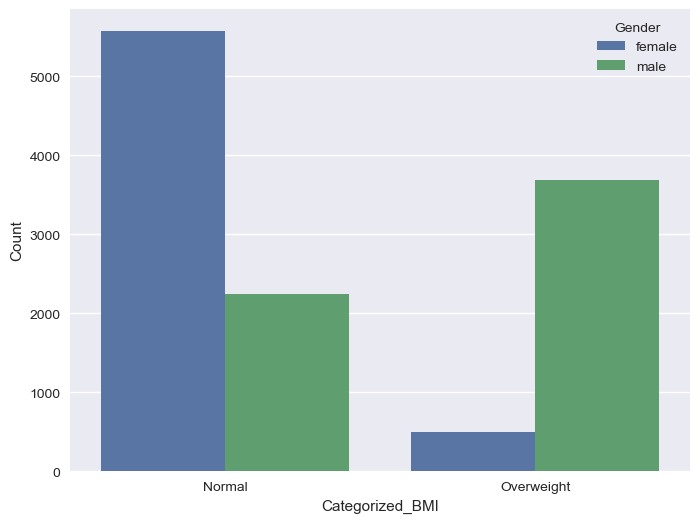

In [27]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "Count" , hue = "Gender")

* An interesting thing that this graph shows is the `weight` distribution between each gender.the number of males who are overweight is way more than the number of females that have the similar situation.And the number of females that are in their ideal weight is really large in compare of other categories.In general, women have a better situation than men.

Now lets plot the `Categirized_BMI` distribution for each group ages.

In [28]:
ds =exercise_train_data[["age_groups" ,"Categorized_BMI"]].value_counts().reset_index().sort_values(by = ["age_groups" , "Categorized_BMI"])
ds.columns = ["age_groups" , "Categorized_BMI" , "Count"]
ds

age_groups Categorized_BMI  Count
0        Young          Normal   4369
2        Young      Overweight   1660
1  Middle-Aged          Normal   2197
3  Middle-Aged      Overweight   1338
4          Old          Normal   1253
5          Old      Overweight   1183

<Axes: xlabel='Categorized_BMI', ylabel='Count'>

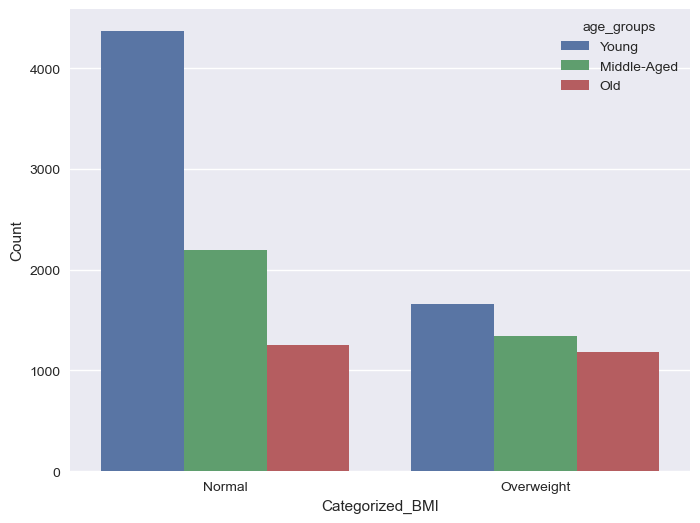

In [29]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "Count" , hue = "age_groups")

* As we can see the `Categorized_BMI` is identically distributed between age groups(the sequence is identical, for example in both `Normal` and `Overweight` ; `Young` comes first , 'Middle-Aged` comes second , etc.)

* An interesting thing is , about `50%` of old individuals have `Normal` weight and another `50%` are `Overweight`. 

# Converting categorical values to numerical values

Before we feed our data to the model we have to first convert `categorical` column(like `Gender`) into `numerical` column.

In [30]:
exercise_train_data = exercise_train_data[["Gender" , "Age" , "BMI" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_test_data = exercise_test_data[["Gender" , "Age" , "BMI"  , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_train_data = pd.get_dummies(exercise_train_data, drop_first = True)
exercise_test_data = pd.get_dummies(exercise_test_data, drop_first = True)

# Separating features and Target

* So now let's seperate X and y for training set and test set.

In [31]:
X_train = exercise_train_data.drop("Calories" , axis = 1)
y_train = exercise_train_data["Calories"]

X_test = exercise_test_data.drop("Calories" , axis = 1)
y_test = exercise_test_data["Calories"]

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000, 6)
(3000, 6)
(12000,)
(3000,)



### Building Linear Regression Model

In [33]:
linreg = LinearRegression()
linreg.fit(X_train , y_train)
linreg_prediction = linreg.predict(X_test)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.

- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.



In [34]:
print("Linear Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , linreg_prediction) , 2))
print("Linear Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , linreg_prediction) , 2))
print("Linear Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , linreg_prediction)) , 2))

Linear Regression Mean Absolute Error(MAE) :  8.52
Linear Regression Mean Squared Error(MSE) :  140.08
Linear Regression Root Mean Squared Error(RMSE) :  11.84


* So we have just implemented a simple `Linear Regression` to predict the calories burned with various parameters.Our RMSE for Linear Regression is about `12` which is acceptable

### RandomForestRegressor Algorithm
* It is a machine learning algorithm that combines multiple decision trees to create a more robust and accurate prediction     model.
* Random Forests are an ensemble of multiple decision trees, they tend to generalize well and are less prone to overfitting compared to single decision trees.
* The relationship between the input features and the target variable is nonlinear and removes outliers.

In [43]:
forest_reg = RandomForestRegressor()
param_grid = {'n_estimators' : [10 , 100 , 1000] , 
              'max_features' : [2 , 2 , 3] , 
              'max_depth' : [2 , 4 , 6]}

grid_search = GridSearchCV(forest_reg , param_grid , cv = 5 , scoring = 'neg_mean_squared_error' , n_jobs = -1 , verbose = 3)
grid_search.fit(X_train , y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6], 'max_features': [2, 2, 3],
                         'n_estimators': [10, 100, 1000]},
             scoring='neg_mean_squared_error', verbose=3)

In [44]:

grid_search.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 1000}

In [45]:

grid_search.best_estimator_

RandomForestRegressor(max_depth=6, max_features=3, n_estimators=1000)

In [46]:
random_reg = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6) # creates 1000 DT ,with max of 3 features for node splitting 
random_reg.fit(X_train , y_train)
random_reg_prediction = random_reg.predict(X_test)

In [47]:
print("RandomForest Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , random_reg_prediction) , 2))
print("RandomForest Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , random_reg_prediction) , 2))
print("RandomForest Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , random_reg_prediction)) , 2))

RandomForest Mean Absolute Error(MAE) :  5.32
RandomForest Mean Squared Error(MSE) :  68.72
RandomForest Root Mean Squared Error(RMSE) :  8.29


* As you can see, we get a slightly better result with `RandomForestRegressor` algorithm.

In [60]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [2, 4, 6], 'max_features': [2, 2, 3],
                         'n_estimators': [10, 100, 1000]},
             verbose=2)

In [61]:
rf_Grid.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 1000}

# Example :
* And now let's make a prediction to test model's performance.First we selected an example randomly and passed some numbers (close to feature values of the example) to the model and compared the results.

In [48]:
exercise_train_data.iloc[33]

Age            32.00
BMI            22.72
Duration        9.00
Heart_Rate     87.00
Body_Temp      39.50
Calories       36.00
Gender_male     0.00
Name: 1152, dtype: float64

In [49]:
X_array = np.array([[32 , 22.72 , 9 , 87 , 39.50 , 0]]).reshape(1 , -1)
y_pred = random_reg.predict(X_array)
print("Prediction : " , round(y_pred[0] , 2))

Prediction :  34.24


* As we can see this model did a good job and the predicted value is close to the real value in the dataset.

# Observation
* We observe that the predicted output is very close to expected output when we use RandomForestRegressor algorithm.
* As we can see the RMSE for ReandomForestRegressor is lower than Linear Regresssion's RMSE.It means that we can make better predictions with RandomForestRegressor.